In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

##Load data and remove irrelevant variables

In [2]:
data = pd.read_csv("../02_data_preparation/candy_w_dummy_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15207 entries, 0 to 15206
Data columns (total 68 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 15207 non-null  int64  
 1   first_purchase             15207 non-null  bool   
 2   shelf_price                15207 non-null  float64
 3   pct_disc                   15207 non-null  float64
 4   pct_retail_disc            15207 non-null  float64
 5   pct_coupon_disc            15207 non-null  float64
 6   display_1                  15207 non-null  int64  
 7   display_2                  15207 non-null  int64  
 8   display_3                  15207 non-null  int64  
 9   display_4                  15207 non-null  int64  
 10  display_5                  15207 non-null  int64  
 11  display_6                  15207 non-null  int64  
 12  display_7                  15207 non-null  int64  
 13  display_9                  15207 non-null  int

In [3]:
data.drop(labels=["Unnamed: 0", "mailer_C", "mailer_F", "mailer_L", 
                  "campaign_25.0", "campaign_26.0", "campaign_30.0", "description_TypeB"],
          axis = 1, inplace = True)

In [4]:
pd.set_option("display.max_columns", None)
data.describe(include = "all")

,first_purchase,shelf_price,pct_disc,pct_retail_disc,pct_coupon_disc,display_1,display_2,display_3,display_4,display_5,display_6,display_7,display_9,display_A,mailer_A,mailer_D,mailer_H,mailer_J,marital_status_A,marital_status_B,homeowner_Homeowner,homeowner_Probable Owner,homeowner_Probable Renter,homeowner_Renter,hhcomp_1 Adult Kids,hhcomp_2 Adults Kids,hhcomp_2 Adults No Kids,hhcomp_Single Female,hhcomp_Single Male,kid_category_1,kid_category_2,kid_category_3+,kid_category_None/Unknown,age_19-24,age_25-34,age_35-44,age_45-54,age_55-64,age_65+,income_100-124K,income_125-149K,income_15-24K,income_150-174K,income_175-199K,income_200-249K,income_25-34K,income_250K+,income_35-49K,income_50-74K,income_75-99K,income_Under 15K,hhsize_1,hhsize_2,hhsize_3,hhsize_4,hhsize_5+,campaign_8.0,campaign_13.0,campaign_18.0,description_TypeA
count,15207,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.00000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000,15207.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,10846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.178575,0.130392,0.128007,0.002385,0.069244,0.015256,0.017821,0.005918,0.023147,0.005721,0.034326,0.017032,0.006247,0.111659,0.007760,0.021635,0.003222,0.437693,0.138160,0.636220,0.017163,0.011442,0.067732,0.066811,0.292037,0.288157,0.156638,0.093773,0.146709,0.104886,0.113961,0.634445,0.047938,0.153153,0.269810,0.407115,0.054054,0.067929,0.041099,0.060038,0.077333,0.040836,0.017097,0.003814,0.099954,0.024265,0.191162,0.245742,0.123298,0.07536,0.302690,0.347340,0.155257,0.090287,0.104426,0.001775,0.001907,0.002959,0.007102
std,NaN,1.688843,0.179378,0.177579,0.030190,0.253878,0.122574,0.132304,0.076705,0.150376,0.075423,0.182072,0.129393,0.078794,0.314957,0.087749,0.145493,0.056675,0.496119,0.345079,0.481102,0.129883,0.106358,0.251294,0.249703,0.454714,0.452919,0.363471,0.291522,0.353827,0.306416,0.317774,0.481601,0.213643,0.360147,0.443876,0.491313,0.226132,0.251633,0.198527,0.237565,0.267128,0.197918,0.129639,0.061642,0.299948,0.153876,0.393229,0.430540,0.328790,0.26398,0.459437,0.476141,0.362162,0.286602,0.305822,0.042101,0.043629,0.054319,0.083976
min,NaN,0.100000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1.390000,0.000000,-0.00

##Dummy model as benchmark

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier 

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import learning_curve, validation_curve

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [8]:
X = data.drop("first_purchase", axis = 1)
y = data["first_purchase"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, stratify = y)

#Define and fit two strategies for dummy model

In [8]:
dummy_frequent = DummyClassifier(strategy = "most_frequent")
dummy_stratified = DummyClassifier(strategy = "stratified")

In [9]:
dummy_frequent.fit(X_train, y_train)
dummy_stratified.fit(X_train, y_train)

DummyClassifier(strategy='stratified')

#Calculate metrics for both dummy models

In [10]:
y_pred_frq = dummy_frequent.predict(X_test)
y_pred_str = dummy_stratified.predict(X_test)

In [11]:
#metrics for dummy classifier / most frequent strategy
scores = [f1_score, precision_score, recall_score, accuracy_score]

for score in scores:
    print(score(y_test, y_pred_frq))

0.8326937835763623
0.7133464825772519
1.0
0.7133464825772519


In [12]:
#metrics for dummy classifier / stratified strategy
scores = [f1_score, precision_score, recall_score, accuracy_score]

for score in scores:
    print(score(y_test, y_pred_str))

0.7020295202952028
0.7026777469990766
0.7013824884792627
0.5752794214332676


##Simple Classifier

In [10]:
clf = DecisionTreeClassifier()
cv = StratifiedShuffleSplit(n_splits = 5) 
f1 = cross_val_score(clf, X_train, y_train, cv=cv, scoring = "f1" )
prec = cross_val_score(clf, X_train, y_train, cv=cv, scoring = "precision" )
rec = cross_val_score(clf, X_train, y_train, cv=cv, scoring = "recall" )
acc = cross_val_score(clf, X_train, y_train, cv=cv, scoring = "accuracy" )
print(f1.mean(), prec.mean(), rec.mean(), acc.mean())

0.7798735283823754 0.8194895359336014 0.7352534562211982 0.6923582580115037


In [11]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Hyperparameter tuning

In [23]:
import scipy

In [24]:
rand_params = {'max_depth': scipy.stats.randint(2,50), "min_samples_leaf": scipy.stats.randint(10,1000), 
               "min_samples_split": scipy.stats.randint(20,2000)}

In [25]:
rand_search = RandomizedSearchCV(clf, rand_params, n_iter=30, scoring = "f1", cv = cv)

In [26]:
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=None,
            train_size=None),
                   estimator=DecisionTreeClassifier(), n_iter=30,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002CAACEFA850>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002CAB08CB8B0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002CAB08DC790>},
                   scoring='f1')

In [27]:
rand_search.best_score_

0.8326139088729017

In [28]:
rand_search.best_estimator_

DecisionTreeClassifier(max_depth=48, min_samples_leaf=803,
                       min_samples_split=1563)

In [13]:
grid_params = {"max_depth":[10, 20, 30, 40, 50], "min_samples_leaf":[10, 20, 50, 100, 200, 300, 400, 500, 600, 800], 
               "min_samples_split":[25, 50, 100, 150, 200, 300, 400, 500]}

In [14]:
grid = GridSearchCV(clf, param_grid = grid_params, scoring = "f1", cv = cv)

In [15]:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=None,
            train_size=None),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [10, 20, 50, 100, 200, 300, 400,
                                              500, 600, 800],
                         'min_samples_split': [25, 50, 100, 150, 200, 300, 400,
                                               500]},
             scoring='f1')

In [16]:
grid.best_score_

0.8326139088729017

In [17]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=600, min_samples_split=25)

Validation

In [19]:
from plotting import plot_learning_curve, plot_validation_curve

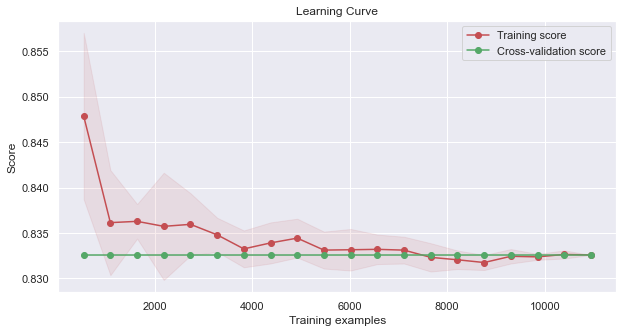

In [30]:
learning_curve = plot_learning_curve(grid.best_estimator_, X_train, y_train, cv = cv,  
                          train_sizes = np.linspace(.05, 1, 20), scoring = "f1")           

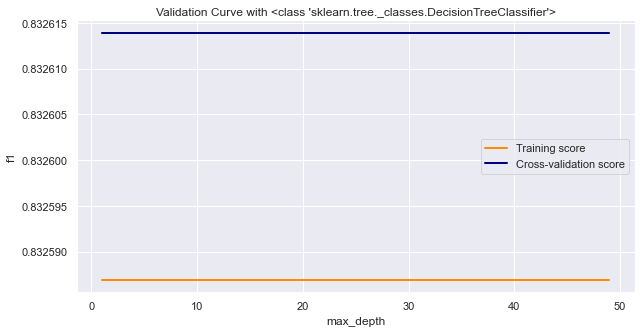

In [31]:
val_max_depth = plot_validation_curve(grid.best_estimator_, X_train, y_train, cv = cv, 
                                      param_name ="max_depth", param_range = np.arange(1,50,1), scoring = "f1")